# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

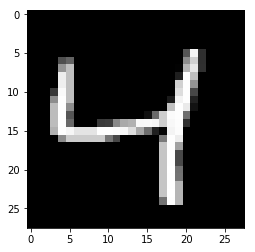

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# image size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, mnist.train.images.shape[1]), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, mnist.train.images.shape[1]), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, mnist.train.images.shape[1], activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [9]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6919
Epoch: 1/20... Training loss: 0.6885
Epoch: 1/20... Training loss: 0.6844
Epoch: 1/20... Training loss: 0.6797
Epoch: 1/20... Training loss: 0.6737
Epoch: 1/20... Training loss: 0.6664
Epoch: 1/20... Training loss: 0.6579
Epoch: 1/20... Training loss: 0.6472
Epoch: 1/20... Training loss: 0.6359
Epoch: 1/20... Training loss: 0.6236
Epoch: 1/20... Training loss: 0.6058
Epoch: 1/20... Training loss: 0.5927
Epoch: 1/20... Training loss: 0.5756
Epoch: 1/20... Training loss: 0.5617
Epoch: 1/20... Training loss: 0.5369
Epoch: 1/20... Training loss: 0.5224
Epoch: 1/20... Training loss: 0.5076
Epoch: 1/20... Training loss: 0.4879
Epoch: 1/20... Training loss: 0.4666
Epoch: 1/20... Training loss: 0.4519
Epoch: 1/20... Training loss: 0.4346
Epoch: 1/20... Training loss: 0.4217
Epoch: 1/20... Training loss: 0.3985
Epoch: 1/20... Training loss: 0.3875
Epoch: 1/20... Training loss: 0.3780
Epoch: 1/20... Training loss: 0.3668
Epoch: 1/20... Training loss: 0.3627
E

Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1767
Epoch: 1/20... Training loss: 0.1827
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1815
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1818
Epoch: 1/20... Training loss: 0.1808
Epoch: 1/20... Training loss: 0.1805
Epoch: 1/20... Training loss: 0.1798
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1778
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1795
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1823
E

Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1460
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1440
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1495
E

Epoch: 3/20... Training loss: 0.1274
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1287
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1302
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1244
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1276
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1304
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1277
E

Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1204
E

Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1185
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1165
E

Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1014
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1117
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1100
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1094
E

Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.0988
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.0946
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1031
E

Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1073
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0959
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1021
E

Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.1034
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0955
E

Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0958
E

Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.1002
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0993
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0893
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0979
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0890
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0884
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0977
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

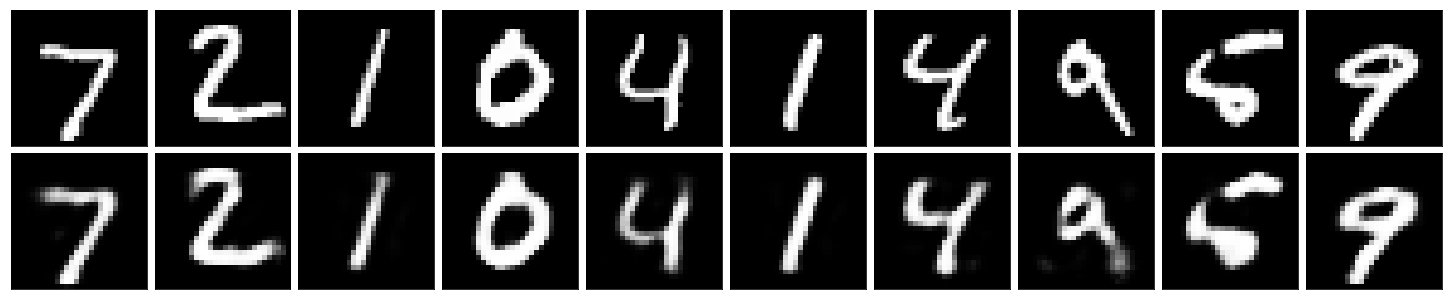

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [11]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.